In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import seaborn as sb

import cellrank as cr
from cellrank.tl.estimators import GPCCA
from cellrank.tl.kernels import VelocityKernel

import scvelo as scv
scv.__version__

%matplotlib inline

In [2]:
wgenes=pd.read_csv('/Users/menghan/Documents/projects/genome_ref/ensembl97_wgenes.txt',sep='\t')

# nasal

Index(['ENSGALG00000040780', 'ENSGALG00000035998', 'ENSGALG00000048286',
       'ENSGALG00000035785', 'ENSGALG00000040263', 'ENSGALG00000029545',
       'ENSGALG00000033705', 'ENSGALG00000043758', 'ENSGALG00000047434',
       'ENSGALG00000048542', 'ENSGALG00000048307', 'ENSGALG00000041221',
       'ENSGALG00000047904', 'ENSGALG00000030382', 'ENSGALG00000031327',
       'ENSGALG00000034488'],
      dtype='object')


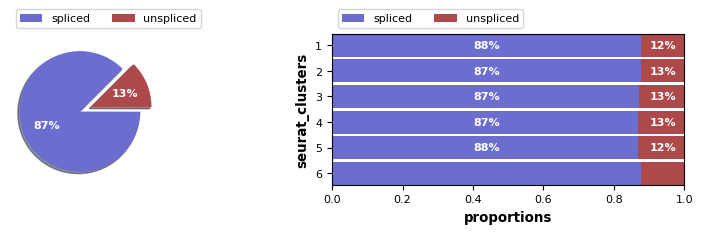

Renamed 'xtsne_cell_embeddings' to convention 'X_xtsne_cell_embeddings' (adata.obsm).


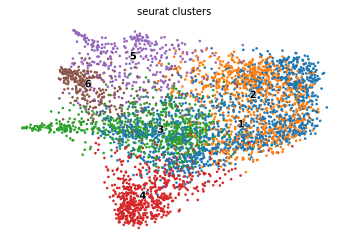

Index(['1', '2', '3', '4', '5', '6'], dtype='object')


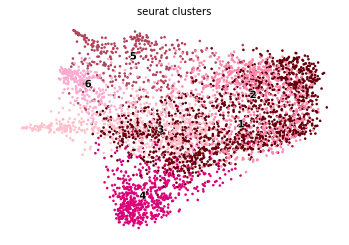

In [3]:
adata=sc.read_loom("/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_nasal.loom")
ldata = scv.read("/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/velocity_9samples.loom", cache=True)

#remove W chr genes
wolp=adata.var_names.intersection(wgenes['ensembl_gene_id'])
print(wolp)
w_gene_indicator = np.in1d(adata.var_names, wgenes['ensembl_gene_id'])
adata = adata[:, ~w_gene_indicator]

adata_loom = ldata[:, adata.var_names]
adata = scv.utils.merge(adata, adata_loom); del ldata

#rename seurat_clusters
sk_module=pd.read_csv('/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_nasal_skModule.txt',sep='\t')
adata.obs['seurat_clusters']=sk_module['seurat_clusters'].values

adata.obs["seurat_clusters"] = adata.obs["seurat_clusters"].astype('category')
scv.pl.proportions(adata, groupby="seurat_clusters")
scv.pl.scatter(adata, basis="xtsne_cell_embeddings", color='seurat_clusters')

print(adata.obs['seurat_clusters'].cat.categories)
recolor=["#65000B","#FC89AC","#FFC0CB","#DC0078","#B0445C","#FCAACF"]
adata.uns['seurat_clusters_colors']=recolor

scv.pl.scatter(adata, basis="xtsne_cell_embeddings", color='seurat_clusters')  

In [4]:
## run scVelo
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata)

scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)


Filtered out 2556 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:51) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_xtsne_cell_embeddings', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_figure1_i.pdf


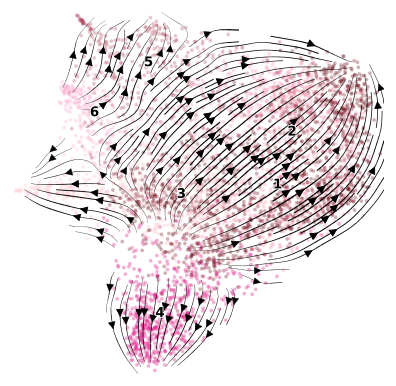

In [14]:
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='seurat_clusters',legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, 
                                 dpi=120,save="figure1_i")

#error: https://github.com/theislab/scvelo/issues/279
#plt.savefig('/Users/menghan/Documents/projects/skeletonConvergence/manuscript/figures/figure1_formal/figure1_I-0.pdf',dpi=300)


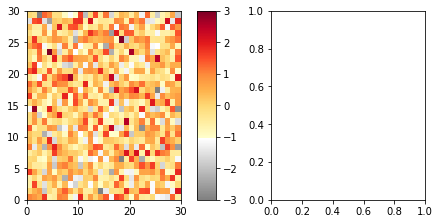

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#https://matplotlib.org/stable/tutorials/colors/colormaps.html
#https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html

def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-3, vmax=3)
        fig.colorbar(psm, ax=ax)
    plt.show()

top = cm.get_cmap('gray', 256)
bottom = cm.get_cmap('YlOrRd', 256)
gray1 = np.array([211/256, 211/256, 211/256, 1])
gray2 = np.array([189/256, 189/256, 189/256, 1])
gray3 = np.array([126/256, 126/256, 126/256, 1])
newcolors = np.vstack((top(np.linspace(0.5, 1, 84)),
                       bottom(np.linspace(0, 1, 172))))
#from colormap import hex2rgb
#print(hex2rgb('#d3d3d3'));print(hex2rgb('#bdbdbd'));print(hex2rgb('#7e7e7e'))
#newcolors[:28, :] = gray3; newcolors[:42, :] = gray2; newcolors[42:84, :] = gray1

newcmp = ListedColormap(newcolors, name='GrayRed')
plot_examples([newcmp])

False
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_xtsne_cell_embeddings', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_figure1_i_sox9.pdf


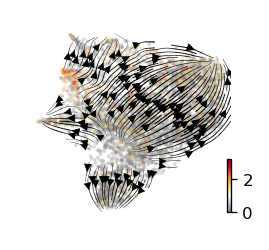

In [6]:
#check if SOX9 in the variable genes
print('ENSGALG00000004386' in adata.var_names)

sox9=pd.read_csv('/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_nasal_sox9Exp.txt',sep='\t')
adata.obs['SOX9_RNA']=sox9['x'].values

#if not in adata.var_names, then cannot plot
#use SOX9 expression as color
#sc.pl.scatter(adata, basis="xtsne_cell_embeddings", color='ENSGALG00000004386', color_map=newcmp)
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='SOX9_RNA', color_map=newcmp,
                                 legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, dpi=120,save="figure1_i_sox9")

saving figure to file ./figures/scvelo_figure1_i_skModule.pdf


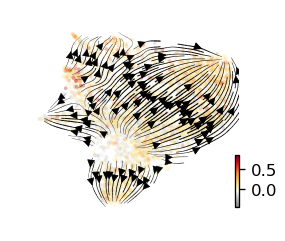

In [7]:
adata.obs['skeletal_Module']=sk_module['skeletal_Features1'].values

#sc.pl.scatter(adata, basis="xtsne_cell_embeddings", color='ENSGALG00000004386', color_map=newcmp)
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='skeletal_Module', color_map=newcmp,
                                 legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, dpi=120,save="figure1_i_skModule")

In [8]:
#https://cellrank.readthedocs.io/en/latest/kernels_and_estimators.html#Infer-terminal-states

#Combining two kernels
#RNA velocity vectors can sometimes be very noisy - to regularize them, let’s combine the VelocityKernel with a ConnectivityKernel, computed on the basis of transcriptomic similarity
vk = VelocityKernel(adata)
vk.compute_transition_matrix()
print(vk)
from cellrank.tl.kernels import ConnectivityKernel
ck = ConnectivityKernel(adata).compute_transition_matrix()
combined_kernel = 0.8 * vk + 0.2 * ck
print(combined_kernel)


<Velo[softmax_scale=8.19, mode=deterministic, seed=7683]>
((0.8 * <Velo[softmax_scale=8.19, mode=deterministic, seed=7683]>) + (0.2 * <Conn[dnorm=True]>))


GPCCA[n=4483, kernel=((0.8 * <Velo[softmax_scale=8.19, mode=deterministic, seed=7683]>) + (0.2 * <Conn[dnorm=True]>))]


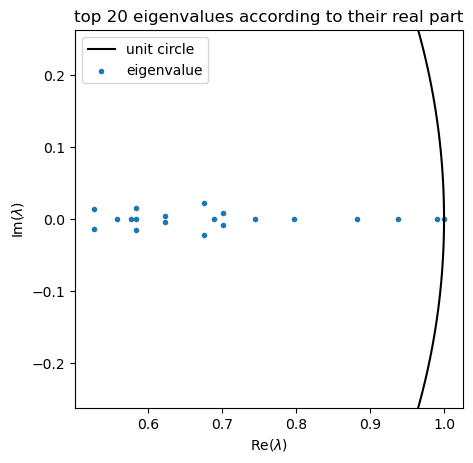

In [9]:
g = GPCCA(combined_kernel)
print(g)
g.compute_schur(n_components=20)
#Above, we plotted the top 20 eigenvalues of the matrix T to see whether there is an apparent eigengap. 
g.plot_spectrum()


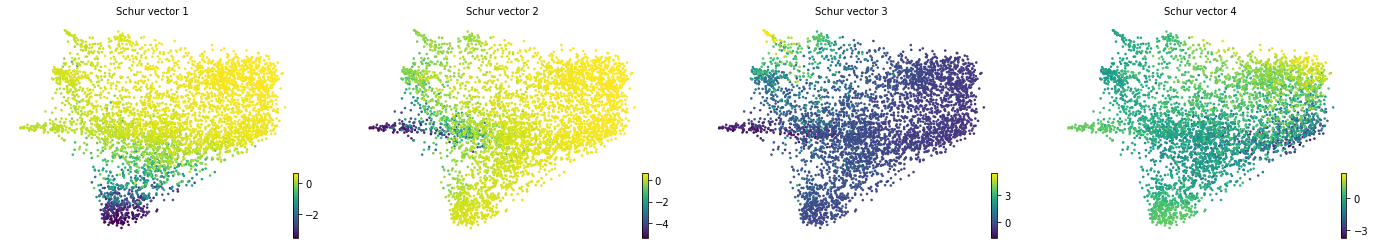

In [10]:
g.plot_schur(use=4, basis='xtsne_cell_embeddings')

INFO: Using pre-computed schur decomposition


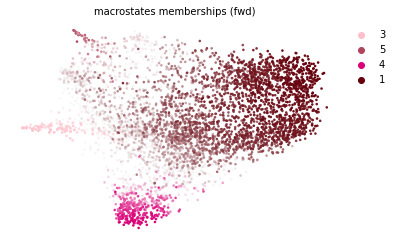

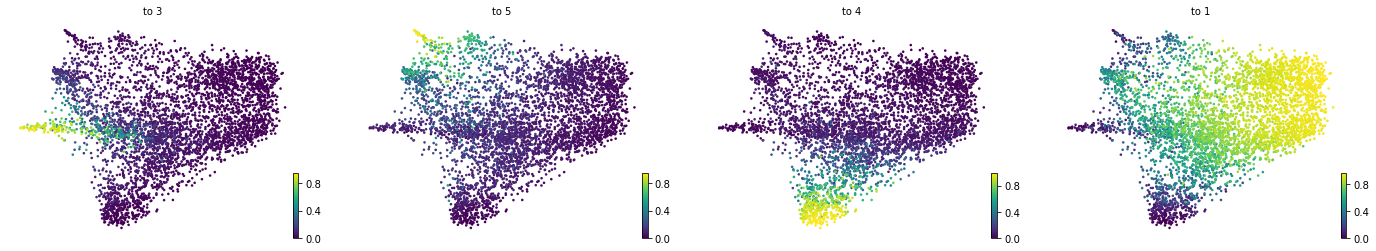

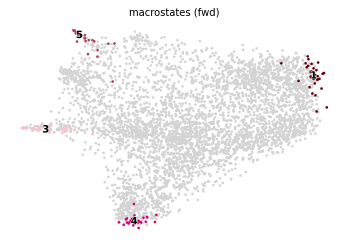

In [11]:
#Infer terminal states
#The next step in GPCCA is to find a linear combination of these vectors such that the Markov chain defined on the subset of states has large self-transition probability
g.compute_macrostates(n_states=4, cluster_key='seurat_clusters')
g.plot_macrostates(basis='xtsne_cell_embeddings')
g.plot_macrostates(same_plot=False,basis='xtsne_cell_embeddings')
g.plot_macrostates(discrete=True,basis='xtsne_cell_embeddings')

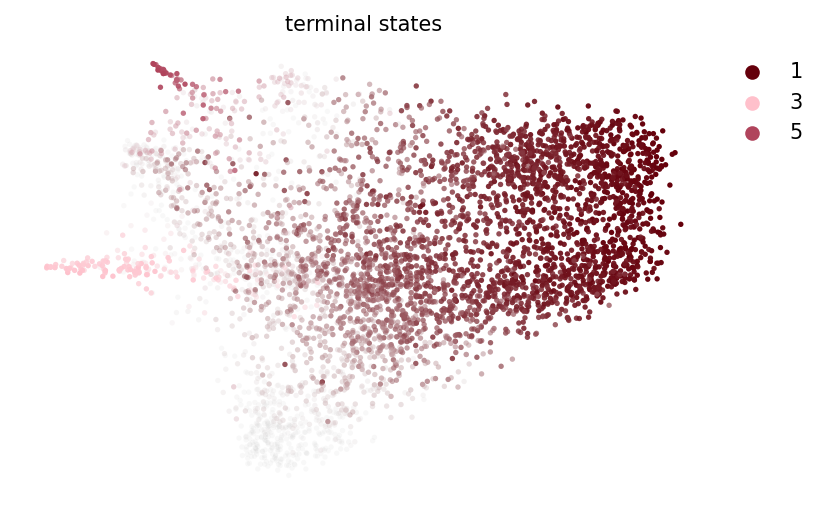

In [12]:
# manually restrict the macrostates by passing a list of macrostate-names that you know are terminal in your data.
g.set_terminal_states_from_macrostates(['1','3','5'])
cr.pl.terminal_states(adata,basis="xtsne_cell_embeddings", dpi=150)

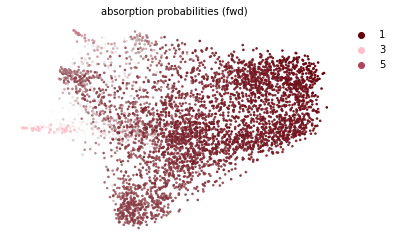

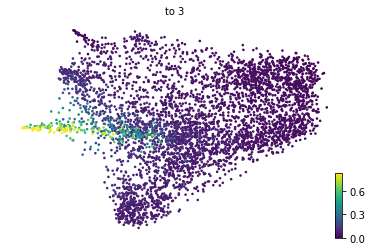

Lineage([[0.91853989, 0.03003818, 0.05142193],
         [0.90623072, 0.04499134, 0.04877794],
         [0.88900129, 0.04559878, 0.06539993],
         ...,
         [0.78674081, 0.09512278, 0.11813642],
         [0.77518469, 0.1104397 , 0.11437562],
         [0.82812545, 0.08039462, 0.09147993]],
  names([1, 3, 5]))

In [13]:
#Estimate fate probabilities
g.compute_absorption_probabilities()
g.absorption_probabilities
g.plot_absorption_probabilities(basis="xtsne_cell_embeddings")
g.plot_absorption_probabilities(same_plot=False,basis="xtsne_cell_embeddings", lineages=['3'], show_dp=False)
g.absorption_probabilities


In [ ]:
#save
adata.obs.to_csv('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_nasal_cellrank_obs.txt')
adata.var.to_csv('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_nasal_cellrank_var.txt')
adata.write('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_nasal_cellrank.hdf5')

# somite

Index(['ENSGALG00000040780', 'ENSGALG00000043758', 'ENSGALG00000035998',
       'ENSGALG00000048286', 'ENSGALG00000040263', 'ENSGALG00000033705',
       'ENSGALG00000034488', 'ENSGALG00000040704', 'ENSGALG00000041221',
       'ENSGALG00000035785', 'ENSGALG00000040086'],
      dtype='object')


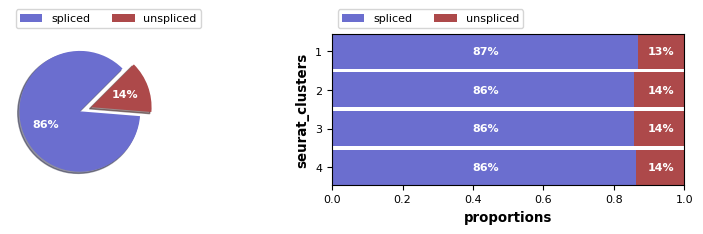

Renamed 'xtsne_cell_embeddings' to convention 'X_xtsne_cell_embeddings' (adata.obsm).


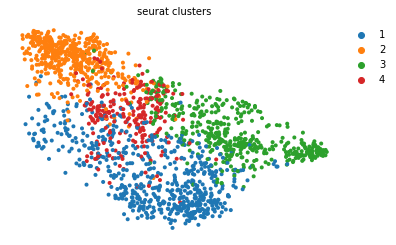

Index(['1', '2', '3', '4'], dtype='object')


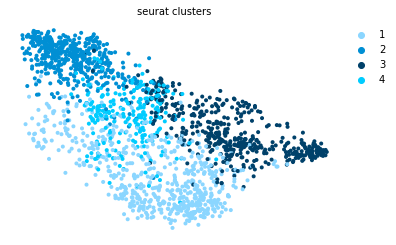

In [14]:
adata=sc.read_loom("/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_somite.loom")
ldata = scv.read("/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/velocity_9samples.loom", cache=True)

#remove W chr genes
wolp=adata.var_names.intersection(wgenes['ensembl_gene_id'])
print(wolp)
w_gene_indicator = np.in1d(adata.var_names, wgenes['ensembl_gene_id'])
adata = adata[:, ~w_gene_indicator]

adata_loom = ldata[:, adata.var_names]
adata = scv.utils.merge(adata, adata_loom); del ldata

adata.obs["seurat_clusters"] = adata.obs["seurat_clusters"].astype('category')
scv.pl.proportions(adata, groupby="seurat_clusters")
scv.pl.scatter(adata, basis="xtsne_cell_embeddings", color='seurat_clusters')

print(adata.obs['seurat_clusters'].cat.categories)
recolor=["#8BD6FF","#008FD4","#00416A","#00CCFF"]
adata.uns['seurat_clusters_colors']=recolor

scv.pl.scatter(adata, basis="xtsne_cell_embeddings", color='seurat_clusters') 

In [15]:
## run scVelo
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata)

scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)


Filtered out 3147 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:00:21) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_xtsne_cell_embeddings', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_figure1_j.pdf


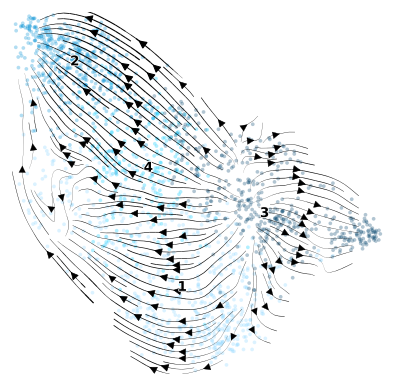

In [16]:
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='seurat_clusters',legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, 
                                 dpi=120,save="figure1_j")

#error: https://github.com/theislab/scvelo/issues/279
#plt.savefig('/Users/menghan/Documents/projects/skeletonConvergence/manuscript/figures/figure1_formal/figure1_J-0.pdf',dpi=300)


False
saving figure to file ./figures/scvelo_figure1_j_sox9.pdf


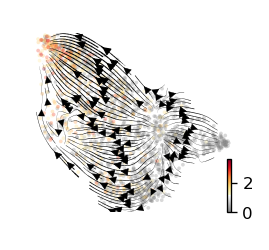

In [17]:
#check if SOX9 in the variable genes
print('ENSGALG00000004386' in adata.var_names)

sox9=pd.read_csv('/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_somite_sox9Exp.txt',sep='\t')
adata.obs['SOX9_RNA']=sox9['x'].values

#if not in adata.var_names, then cannot plot
#use SOX9 expression as color
#sc.pl.scatter(adata, basis="xtsne_cell_embeddings", color='ENSGALG00000004386', color_map=newcmp)
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='SOX9_RNA', color_map=newcmp,
                                 legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, dpi=120,save="figure1_j_sox9")

saving figure to file ./figures/scvelo_figure1_j_skModule.pdf


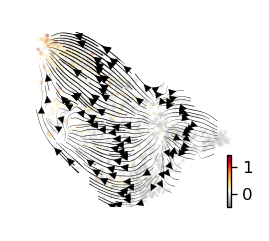

In [18]:
sk_module=pd.read_csv('/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_somite_skModule.txt',sep='\t')
adata.obs['skeletal_Module']=sk_module['skeletal_Features1'].values

#if not in adata.var_names, then cannot plot
#use SOX9 expression as color
#sc.pl.scatter(adata, basis="xtsne_cell_embeddings", color='ENSGALG00000004386', color_map=newcmp)
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='skeletal_Module', color_map=newcmp,
                                 legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, dpi=120,save="figure1_j_skModule")

In [19]:
#Combining two kernels
#RNA velocity vectors can sometimes be very noisy - to regularize them, let’s combine the VelocityKernel with a ConnectivityKernel, computed on the basis of transcriptomic similarity
vk = VelocityKernel(adata)
vk.compute_transition_matrix()
print(vk)
from cellrank.tl.kernels import ConnectivityKernel
ck = ConnectivityKernel(adata).compute_transition_matrix()
combined_kernel = 0.8 * vk + 0.2 * ck
print(combined_kernel)



<Velo[softmax_scale=8.5, mode=deterministic, seed=27844]>
((0.8 * <Velo[softmax_scale=8.5, mode=deterministic, seed=27844]>) + (0.2 * <Conn[dnorm=True]>))


GPCCA[n=1857, kernel=((0.8 * <Velo[softmax_scale=8.5, mode=deterministic, seed=27844]>) + (0.2 * <Conn[dnorm=True]>))]


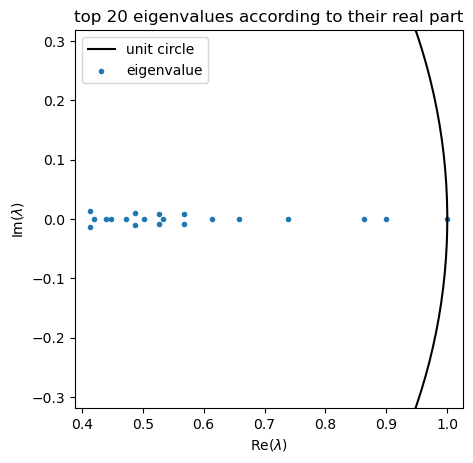

In [20]:
g = GPCCA(combined_kernel)
print(g)
g.compute_schur(n_components=20)
#Above, we plotted the top 20 eigenvalues of the matrix T to see whether there is an apparent eigengap. 
g.plot_spectrum()


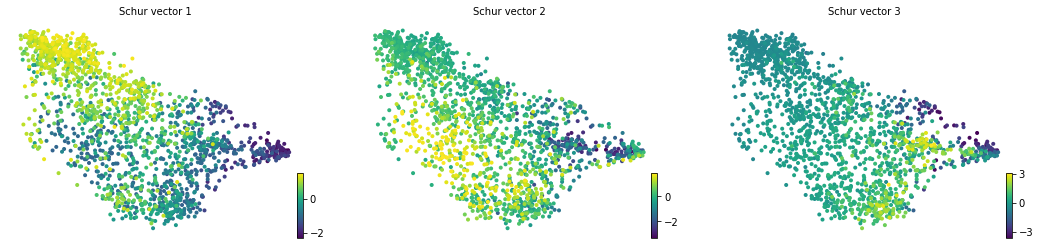

In [21]:
g.plot_schur(use=3, basis='xtsne_cell_embeddings')

INFO: Using pre-computed schur decomposition


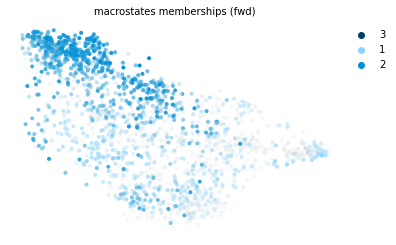

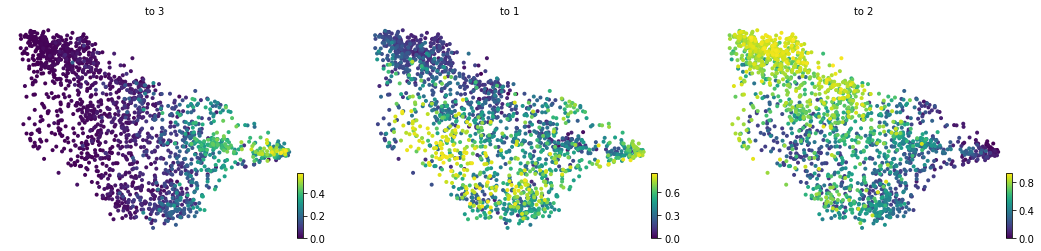

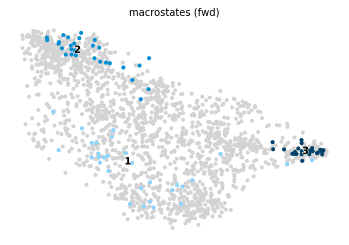

In [22]:
#Infer terminal states
#The next step in GPCCA is to find a linear combination of these vectors such that the Markov chain defined on the subset of states has large self-transition probability
g.compute_macrostates(n_states=3, cluster_key='seurat_clusters')
g.plot_macrostates(basis='xtsne_cell_embeddings')
g.plot_macrostates(same_plot=False,basis='xtsne_cell_embeddings')
g.plot_macrostates(discrete=True,basis='xtsne_cell_embeddings')

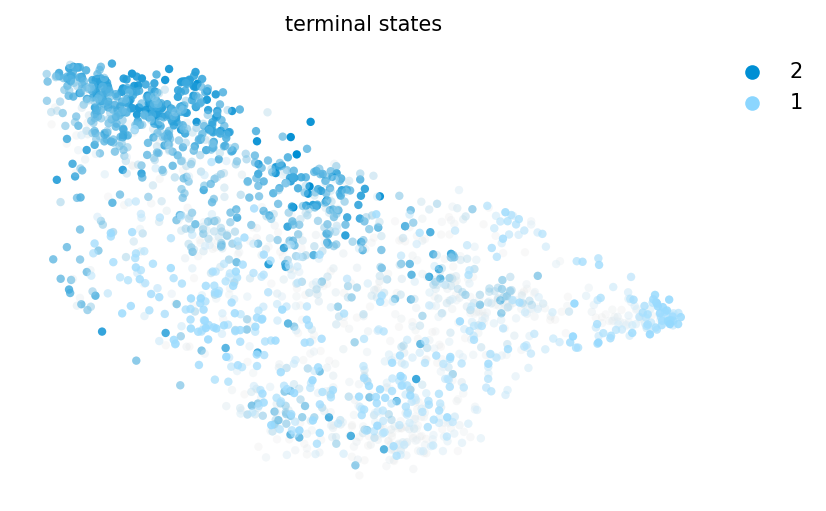

In [23]:
# manually restrict the macrostates by passing a list of macrostate-names that you know are terminal in your data.
g.set_terminal_states_from_macrostates(['2','1'])
cr.pl.terminal_states(adata,basis="xtsne_cell_embeddings", dpi=150)

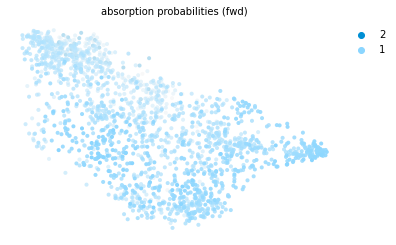

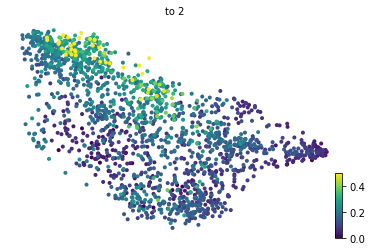

Lineage([[0.15564314, 0.84435686],
         [0.09384777, 0.90615223],
         [0.13821173, 0.86178827],
         ...,
         [0.07513041, 0.92486959],
         [0.07953833, 0.92046167],
         [0.17659775, 0.82340225]],
  names([2, 1]))

In [24]:
#Estimate fate probabilities
g.compute_absorption_probabilities()
g.absorption_probabilities
g.plot_absorption_probabilities(basis="xtsne_cell_embeddings")
g.plot_absorption_probabilities(same_plot=False,basis="xtsne_cell_embeddings", lineages=['2'], show_dp=False)
g.absorption_probabilities


In [ ]:
#save
adata.obs.to_csv('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_somite_cellrank_obs.txt')
adata.var.to_csv('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_somite_cellrank_var.txt')
adata.write('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_somite_cellrank.hdf5')

# limb

Index(['ENSGALG00000047434'], dtype='object')


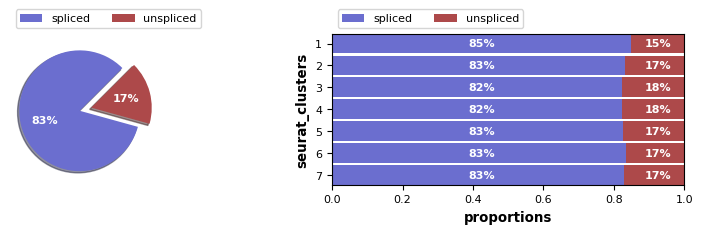

Renamed 'xtsne_cell_embeddings' to convention 'X_xtsne_cell_embeddings' (adata.obsm).


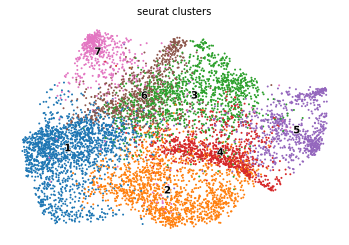

Index(['1', '2', '3', '4', '5', '6', '7'], dtype='object')


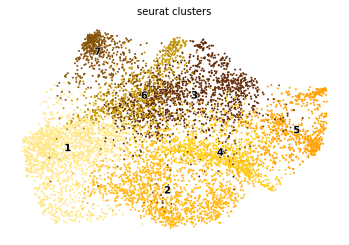

In [25]:
adata=sc.read_loom("/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_limb.loom")
ldata = scv.read("/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/velocity_9samples.loom", cache=True)

#remove W chr genes
wolp=adata.var_names.intersection(wgenes['ensembl_gene_id'])
print(wolp)
w_gene_indicator = np.in1d(adata.var_names, wgenes['ensembl_gene_id'])
adata = adata[:, ~w_gene_indicator]

adata_loom = ldata[:, adata.var_names]
adata = scv.utils.merge(adata, adata_loom); del ldata

adata.obs["seurat_clusters"] = adata.obs["seurat_clusters"].astype('category')
scv.pl.proportions(adata, groupby="seurat_clusters")
scv.pl.scatter(adata, basis="xtsne_cell_embeddings", color='seurat_clusters')

print(adata.obs['seurat_clusters'].cat.categories)
recolor=["#FFE78A","#FFB817","#662D0B","#FFD01F","#FFA309","#C49606","#88540B"]
adata.uns['seurat_clusters_colors']=recolor

scv.pl.scatter(adata, basis="xtsne_cell_embeddings", color='seurat_clusters') 

In [26]:
## run scVelo
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

scv.tl.recover_dynamics(adata)

scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)


Filtered out 2490 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics
    finished (0:01:52) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_xtsne_cell_embeddings', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_figure1_k.pdf


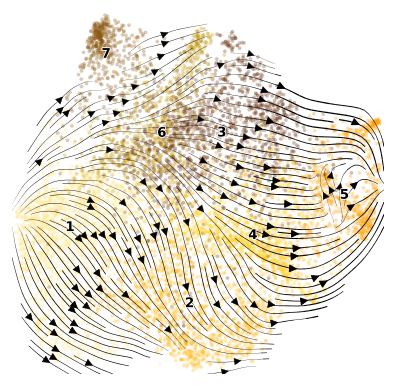

In [27]:
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='seurat_clusters',legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, 
                                 dpi=120,save="figure1_k")

#error: https://github.com/theislab/scvelo/issues/279
#plt.savefig('/Users/menghan/Documents/projects/skeletonConvergence/manuscript/figures/figure1_formal/figure1_K-0.pdf',dpi=300)


False
saving figure to file ./figures/scvelo_figure1_k_sox9.pdf


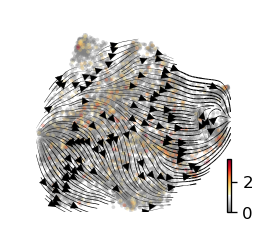

In [28]:
#check if SOX9 in the variable genes
print('ENSGALG00000004386' in adata.var_names)

sox9=pd.read_csv('/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_limb_sox9Exp.txt',sep='\t')
adata.obs['SOX9_RNA']=sox9['x'].values

#if not in adata.var_names, then cannot plot
#use SOX9 expression as color
#sc.pl.scatter(adata, basis="xtsne_cell_embeddings", color='ENSGALG00000004386', color_map=newcmp)
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='SOX9_RNA', color_map=newcmp,
                                 legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, dpi=120,save="figure1_k_sox9")

saving figure to file ./figures/scvelo_figure1_k_skModule.pdf


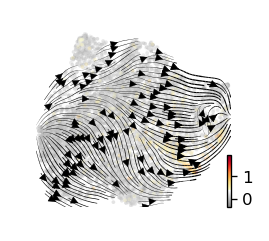

In [29]:
sk_module=pd.read_csv('/Users/menghan/Documents/projects/skeletonConvergence/results/reslt_scRNA/pseudotime/scrnaSub_limb_skModule.txt',sep='\t')
adata.obs['skeletal_Module']=sk_module['skeletal_Features1'].values

#sc.pl.scatter(adata, basis="xtsne_cell_embeddings", color='ENSGALG00000004386', color_map=newcmp)
scv.pl.velocity_embedding_stream(adata, basis='xtsne_cell_embeddings', color='skeletal_Module', color_map=newcmp,
                                 legend_fontsize=8, smooth=.8, min_mass=3, 
                                 title='', size=20, figsize=(4,4), linewidth=0.4, dpi=120,save="figure1_k_skModule")

In [30]:
#Combining two kernels
#RNA velocity vectors can sometimes be very noisy - to regularize them, let’s combine the VelocityKernel with a ConnectivityKernel, computed on the basis of transcriptomic similarity
vk = VelocityKernel(adata)
vk.compute_transition_matrix()
print(vk)
from cellrank.tl.kernels import ConnectivityKernel
ck = ConnectivityKernel(adata).compute_transition_matrix()
combined_kernel = 0.8 * vk + 0.2 * ck
print(combined_kernel)


<Velo[softmax_scale=10.96, mode=deterministic, seed=13856]>
((0.8 * <Velo[softmax_scale=10.96, mode=deterministic, seed=13856]>) + (0.2 * <Conn[dnorm=True]>))


GPCCA[n=7611, kernel=((0.8 * <Velo[softmax_scale=10.96, mode=deterministic, seed=13856]>) + (0.2 * <Conn[dnorm=True]>))]


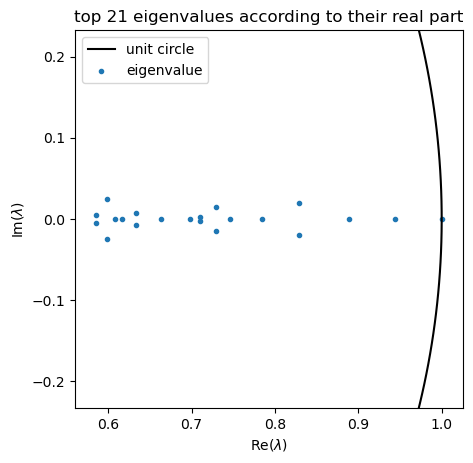

In [31]:
g = GPCCA(combined_kernel)
print(g)
g.compute_schur(n_components=20)
#Above, we plotted the top 20 eigenvalues of the matrix T to see whether there is an apparent eigengap. 
g.plot_spectrum()

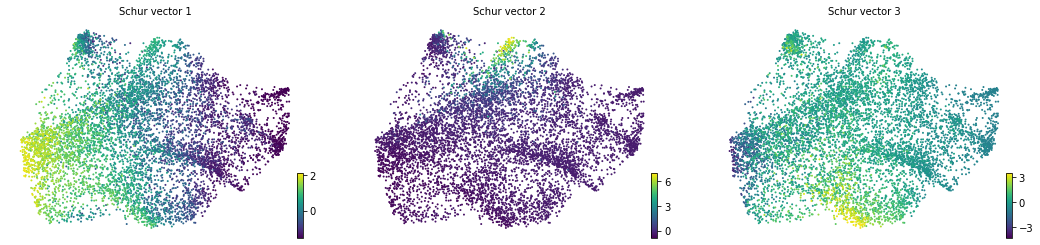

In [32]:
g.plot_schur(use=3, basis='xtsne_cell_embeddings')

INFO: Using pre-computed schur decomposition


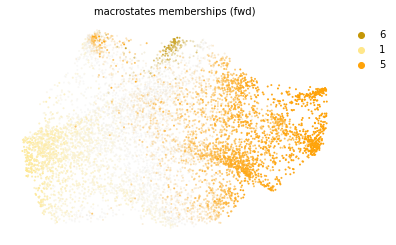

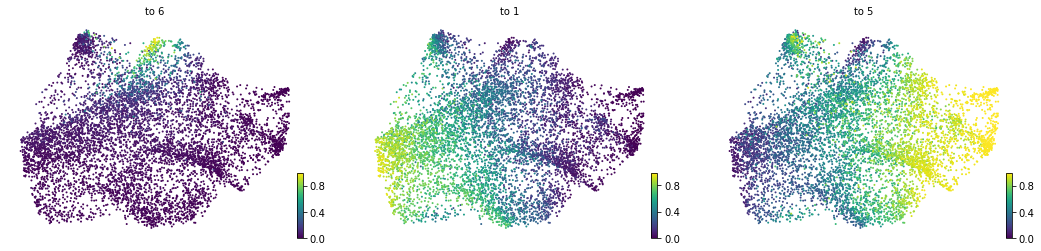

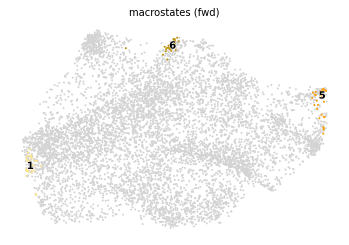

In [33]:
#Infer terminal states
#The next step in GPCCA is to find a linear combination of these vectors such that the Markov chain defined on the subset of states has large self-transition probability
g.compute_macrostates(n_states=3, cluster_key='seurat_clusters')
g.plot_macrostates(basis='xtsne_cell_embeddings')
g.plot_macrostates(same_plot=False,basis='xtsne_cell_embeddings')
g.plot_macrostates(discrete=True,basis='xtsne_cell_embeddings')

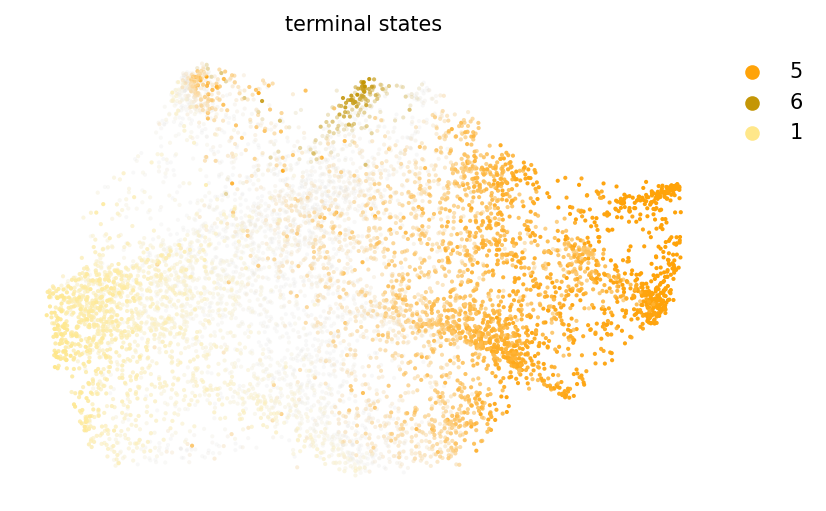

In [34]:
# manually restrict the macrostates by passing a list of macrostate-names that you know are terminal in your data.
g.set_terminal_states_from_macrostates(['5','6','1'])
#g.set_terminal_states(['5','3','2'])
cr.pl.terminal_states(adata,basis="xtsne_cell_embeddings", dpi=150)

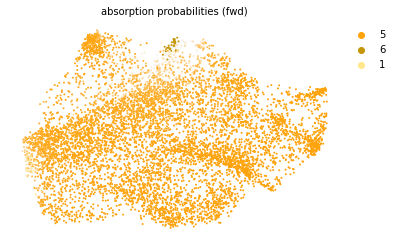

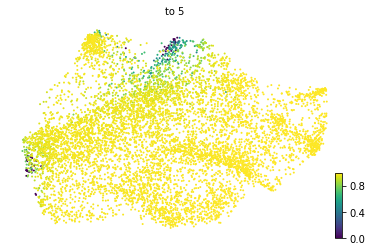

Lineage([[9.67158401e-01, 3.25328622e-02, 3.08736468e-04],
         [9.96914543e-01, 2.99233302e-03, 9.31242341e-05],
         [9.45107647e-01, 5.45985710e-02, 2.93782023e-04],
         ...,
         [8.94794996e-01, 1.04930788e-01, 2.74216646e-04],
         [9.91872079e-01, 7.73225656e-03, 3.95664427e-04],
         [9.49466754e-01, 5.03518114e-02, 1.81434736e-04]],
  names([5, 6, 1]))

In [35]:
#Estimate fate probabilities
g.compute_absorption_probabilities()
g.absorption_probabilities
g.plot_absorption_probabilities(basis="xtsne_cell_embeddings")
g.plot_absorption_probabilities(same_plot=False,basis="xtsne_cell_embeddings", lineages=['5'], show_dp=False)
g.absorption_probabilities


In [ ]:
#save
adata.obs.to_csv('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_limb_cellrank_obs.txt')
adata.var.to_csv('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_limb_cellrank_var.txt')
adata.write('/Users/menghan/Documents/projects/skeletonConvergence/processedData/procss_scRNA/scrnaSub_limb_cellrank.hdf5')